In [51]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [52]:

# Parameters for the dataset
n_samples = 250
n_features = 500
n_informative = 100
n_redundant = 100
n_repeated = 100
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=n_repeated,
    n_classes=2,
    random_state=0,
    n_clusters_per_class=1,
    shuffle=False,
    # shift=30,
    scale=1,
    class_sep=2
)


In [53]:
# X_log2 = np.log2(X + 1)
# noise = np.random.normal(0, 0.1, X_log2.shape)
# X_log2_hetero = X_log2 + noise

In [54]:
protein_ids = [f'Protein_{i+1}' for i in range(n_features)]

In [55]:

X = pd.DataFrame(X, columns=protein_ids)

X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_491,Protein_492,Protein_493,Protein_494,Protein_495,Protein_496,Protein_497,Protein_498,Protein_499,Protein_500
0,-4.239205,13.313452,3.838719,-1.166393,1.400347,5.850813,13.763278,2.436223,-0.241672,0.845636,...,0.261087,-0.273063,0.760616,1.547717,-1.302704,0.040399,-0.989970,-0.604087,0.298167,-0.881622
1,-9.680002,-4.126986,-4.700654,5.897694,-10.180823,4.232952,-1.341360,3.963022,-7.347581,-5.249200,...,-0.562107,-0.269055,-1.799715,-0.305790,-0.552444,0.038316,-0.262023,-1.003799,-0.434016,0.754108
2,2.528459,9.907988,-2.259521,-9.934600,6.132748,-5.951520,0.773820,1.371553,4.526629,2.721340,...,1.049513,-0.534449,-0.668464,1.370789,0.469745,0.086381,-0.758262,1.403730,0.884430,-0.320007
3,-1.886479,6.927967,-2.284127,3.206439,-2.915475,-10.575231,-4.825052,7.414725,-0.117419,14.839188,...,-0.073412,-2.377679,-0.412135,0.990129,-0.414904,-1.116975,1.744081,-1.891394,-0.002471,0.315686
4,-4.447934,-1.871923,2.306739,4.056194,8.740927,-11.371929,-2.471158,0.843810,2.015255,6.907670,...,-0.867666,0.120360,-1.384248,0.681702,0.589385,-0.159926,-0.317480,0.661487,-0.528315,-0.651038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,10.571161,-6.714008,7.422686,-5.529087,-0.112078,11.134154,-2.115875,4.429676,1.740802,-0.093840,...,-1.413646,2.074392,-0.334596,-0.225055,1.503216,-0.061077,1.880798,-1.238220,-0.494343,-0.581538
246,-7.467218,-7.763583,-8.990676,-8.411800,6.807434,-8.004234,-5.839093,-3.663488,12.722434,-6.391557,...,-0.085993,0.554117,-1.031788,0.837138,-2.141357,0.484232,-1.306630,0.428226,-1.402655,0.922114
247,3.178942,3.167160,-0.080075,10.041390,2.232510,6.147164,10.648699,9.654744,4.854061,10.286483,...,0.420746,1.869642,-1.584632,-1.505661,-0.884253,-1.667499,0.660397,-0.739927,0.750774,0.267371
248,-1.789420,-4.066932,-9.943323,-8.425042,-1.729882,-4.868964,8.124213,-9.604457,8.504589,-12.486586,...,-1.574552,-0.688706,0.232194,-0.106333,1.565732,1.153120,1.974783,-0.522077,1.784065,-1.729566


In [56]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [57]:
from umap import UMAP

pca = UMAP(n_components=2, n_neighbors=5)

pca.fit(X)

components = pca.transform(X)

C:\Users\aaron\anaconda3\envs\dpksenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aaron\anaconda3\envs\dpksenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [58]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

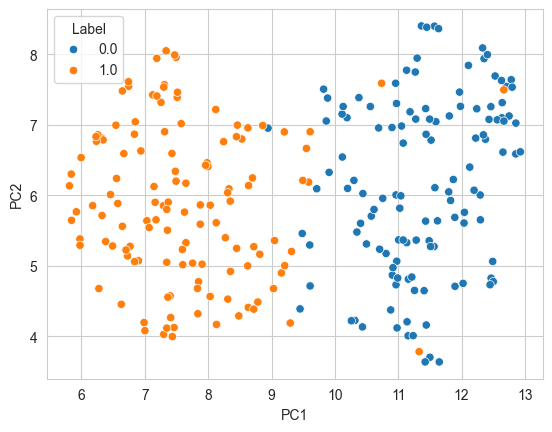

In [59]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [60]:
samples = [f'Sample_{i+1}' for i in range(n_samples)]
# df = pd.DataFrame(X, index=protein_ids, columns=samples)
# df = df.reset_index(names="Protein")

In [61]:
df = X.T.rename(
    columns={
        colidx: sample for colidx, sample in enumerate(samples)
    }
).reset_index(names="Protein")

In [62]:
group_labels = y

In [63]:
design_matrix = pd.DataFrame(
    {
        "sample": samples,
        "group": group_labels,
    }
)

In [64]:
design_matrix.to_csv(
    "../tests/input_files/simulated_design_matrix.tsv",
    sep="\t",
    index=False,
)

In [65]:
df.to_csv(
    "../tests/input_files/simulated_proteins.tsv",
    sep="\t",
    index=False,
)

In [66]:
from dpks.quant_matrix import QuantMatrix

quant_matrix = QuantMatrix(
    quantification_file=df,
    design_matrix_file=design_matrix,
)

In [67]:
quant_matrix = quant_matrix.compare(
    method="anova",
    comparisons=(1, 0),
    min_samples_per_group=2,
    level="protein",
    multiple_testing_correction_method="fdr_tsbh",
    log2_transformed=True
)

In [68]:
da_df = quant_matrix.row_annotations

In [69]:
da_df

,Protein,DEScore1-0,Group1Mean,Group0Mean,Group1Stdev,Group0Stdev,Log2FoldChange1-0,PValue1-0,Group1RepCounts,Group0RepCounts,CorrectedPValue1-0,-Log10CorrectedPValue1-0
0,Protein_1,0.154076,1.289304,0.107996,5.924400,6.027068,1.181308,0.072758,126,250,0.193688,0.712897
1,Protein_2,0.003083,2.012983,2.051039,5.730246,6.243926,-0.038056,0.954441,126,250,0.770573,0.113186
2,Protein_3,0.264329,-2.213499,-0.597819,5.548501,5.773275,-1.615680,0.010030,126,250,0.034260,1.465208
3,Protein_4,0.051880,-2.196244,-1.680624,5.825375,6.039221,-0.515620,0.430827,126,250,0.710339,0.148534
4,Protein_5,0.380164,-2.364847,-0.188868,5.951982,6.212453,-2.175979,0.001292,126,250,0.009237,2.034474
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Protein_496,0.056832,0.179641,0.078801,1.035961,0.984300,0.100840,0.358807,126,250,0.636240,0.196379
496,Protein_497,0.005902,-0.030044,-0.043493,0.993024,0.956255,0.013448,0.899224,126,250,0.770573,0.113186
497,Protein_498,0.027183,0.037849,-0.017756,1.016402,0.994817,0.055605,0.612783,126,250,0.770573,0.113186
498,Protein_499,0.046163,-0.097012,-0.010386,1.008872,1.013589,-0.086626,0.435070,126,250,0.710339,0.148534


In [70]:
da_df['ProteinNum'] = da_df['Protein'].str.split("_").str[-1].astype(int)

In [76]:
da_df['DAType'] = np.where(da_df['ProteinNum'] <= 100, 1, np.where(da_df['ProteinNum'] < 200, 2, np.where(da_df['ProteinNum'] < 300, 3, 0)))

<Axes: xlabel='Log2FoldChange1-0', ylabel='-Log10CorrectedPValue1-0'>

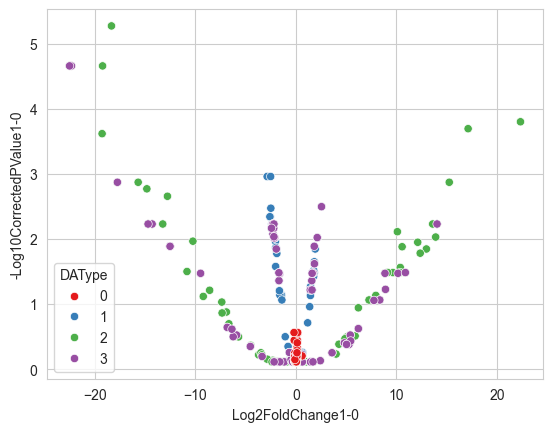

In [77]:
sns.scatterplot(
    data=da_df,
    x="Log2FoldChange1-0",
    y="-Log10CorrectedPValue1-0",
    hue="DAType",
    palette="Set1",
)

In [78]:
da_df

,Protein,DEScore1-0,Group1Mean,Group0Mean,Group1Stdev,Group0Stdev,Log2FoldChange1-0,PValue1-0,Group1RepCounts,Group0RepCounts,CorrectedPValue1-0,-Log10CorrectedPValue1-0,ProteinNum,DAType
0,Protein_1,0.154076,1.289304,0.107996,5.924400,6.027068,1.181308,0.072758,126,250,0.193688,0.712897,1,1
1,Protein_2,0.003083,2.012983,2.051039,5.730246,6.243926,-0.038056,0.954441,126,250,0.770573,0.113186,2,1
2,Protein_3,0.264329,-2.213499,-0.597819,5.548501,5.773275,-1.615680,0.010030,126,250,0.034260,1.465208,3,1
3,Protein_4,0.051880,-2.196244,-1.680624,5.825375,6.039221,-0.515620,0.430827,126,250,0.710339,0.148534,4,1
4,Protein_5,0.380164,-2.364847,-0.188868,5.951982,6.212453,-2.175979,0.001292,126,250,0.009237,2.034474,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Protein_496,0.056832,0.179641,0.078801,1.035961,0.984300,0.100840,0.358807,126,250,0.636240,0.196379,496,0
496,Protein_497,0.005902,-0.030044,-0.043493,0.993024,0.956255,0.013448,0.899224,126,250,0.770573,0.113186,497,0
497,Protein_498,0.027183,0.037849,-0.017756,1.016402,0.994817,0.055605,0.612783,126,250,0.770573,0.113186,498,0
498,Protein_499,0.046163,-0.097012,-0.010386,1.008872,1.013589,-0.086626,0.435070,126,250,0.710339,0.148534,499,0


In [74]:
quant_matrix.quantitative_data.X

array([[-4.23920483, -9.68000177,  2.52845949, ...,  3.17894188,
        -1.78941985, -7.27564344],
       [13.31345218, -4.12698627,  9.90798833, ...,  3.16716033,
        -4.0669324 , 16.37210489],
       [ 3.83871917, -4.70065408, -2.25952085, ..., -0.08007471,
        -9.94332285, -0.31613258],
       ...,
       [-0.60408748, -1.00379903,  1.40373015, ..., -0.7399272 ,
        -0.52207663, -1.58785753],
       [ 0.29816669, -0.43401631,  0.88443043, ...,  0.75077369,
         1.78406454, -0.66596259],
       [-0.88162203,  0.75410769, -0.32000663, ...,  0.26737058,
        -1.72956578,  0.37768759]])

<Axes: xlabel='Log2FoldChange1-0', ylabel='Count'>

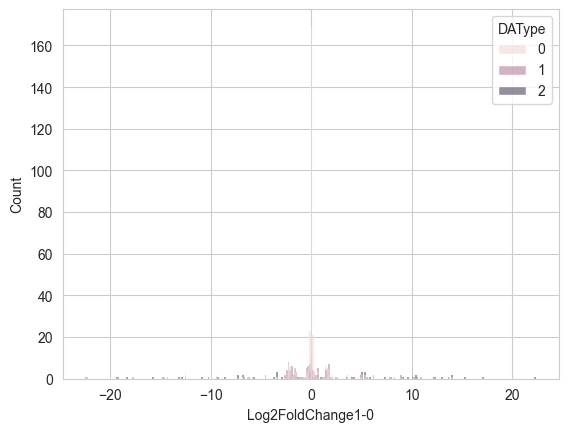

In [75]:
sns.histplot(
    data=da_df,
    x="Log2FoldChange1-0",
    hue="DAType",
)